# UCI Bank Marketing Dataset
url: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
## related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## social and economic context attributes (not included in bank-full.csv):
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

## target:
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
# reading in data to create df
import pandas as pd 

df = pd.read_csv('bank-full.csv', delimiter=";")
print(df.shape)
df.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# checking for any null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# checking all numeric columns stats 
df.describe()

'''
- seeing observations include clients from age 18-95 with an average 
age of 41
- average balance of all observations is ~$3000 with a range of [-8000, 100000]
- average duration of campaign call is 258 seconds
- average of 40 days until client is contacted again
- only 1/2 of clients have been contacted previous to the observation call
'''

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# getting overview of categorical columns
df.describe(exclude='number')

'''
- 12 different job categories, blue-collar being the most common
- most common marital status is married
- most common education is high school
- most clients have housing loans
- most clients do not have personal loans
- most clients are not successfully subscribed
'''

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [10]:
# checking marital value counts
df['marital'].value_counts()
# found most are married

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

## some plots/diagrams to check some intuitive relationships

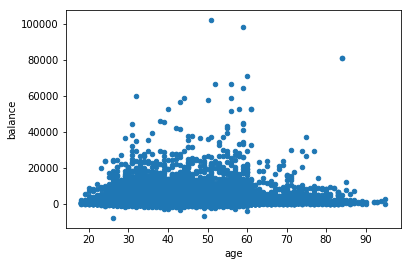

In [12]:
# is age and balance correlated? 
df.plot.scatter(x='age', y='balance');

In [20]:
# crosstab of job and y
job_y = pd.crosstab(df['job'], df['y'])
job_y['percent_yes'] = job_y['yes'] / (job_y['yes'] + job_y['no'])
job_y.sort_values(by='percent_yes', ascending=False)

y,no,yes,percent_yes
job,,,
student,669,269,0.286780
retired,1748,516,0.227915
unemployed,1101,202,0.155027
management,8157,1301,0.137556
admin.,4540,631,0.122027
self-employed,1392,187,0.118429
unknown,254,34,0.118056
technician,6757,840,0.110570
services,3785,369,0.088830


In [21]:
# crosstab of education and y
cross_with_per = pd.crosstab(df['education'], df['y'])
cross_with_per['percent_yes'] = cross_with_per['yes'] / (cross_with_per['yes'] + cross_with_per['no'])
cross_with_per.sort_values(by='percent_yes', ascending=False)

y,no,yes,percent_yes
education,,,
tertiary,11305,1996,0.150064
unknown,1605,252,0.135703
secondary,20752,2450,0.105594
primary,6260,591,0.086265
